In [2]:
"""
    View base coverage for multiple individuals for a given region.
"""
from biograph import new_graph, reference, find_variants, visualize

In [3]:
# Import data from 125 individuals
everybody = new_graph("/mnt/cohort_125.gbwt")

In [4]:
# Import a reference
grch37 = reference("/reference/human_g1k_v37/")

In [5]:
# Import some individual readsets
all_reads = everybody.all_readset()
na12877_reads = everybody.load_readset('/mnt/NA12877_S1.bitmap')
na12878_reads = everybody.load_readset('/mnt/NA12878_S1.bitmap')
na12879_reads = everybody.load_readset('/mnt/NA12879_S1.bitmap')

In [15]:
# Make pick an area of interest
chromosome = "5"
start = 1030000
end = 1060000

In [16]:
# Find variants and coverage for this area
r1 = find_variants(everybody, grch37, chromosome, start, end, readset=na12877_reads)[0]
r2 = find_variants(everybody, grch37, chromosome, start, end, readset=na12878_reads)[0]
r3 = find_variants(everybody, grch37, chromosome, start, end, readset=na12879_reads)[0]

coverage77 = r1.coverage
coverage78 = r2.coverage
coverage79 = r3.coverage

ref_range = r1.ref_range

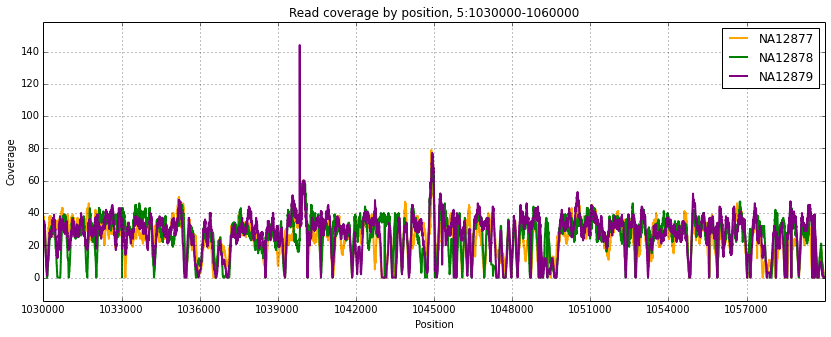

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure()

fig, ax = plt.subplots(figsize=(14,5))

line1 = plt.plot(coverage77, color='orange', linewidth=2)
line2 = plt.plot(coverage78, color='green', linewidth=2)
line3 = plt.plot(coverage79, color='purple', linewidth=2)

plt.xlabel('Position')
plt.ylabel('Coverage')
plt.title('Read coverage by position, {chr}:{start}-{end}'.format(
        chr=ref_range.scaffold, start=ref_range.start, end=ref_range.end
    )
)
plt.grid(True)

ax.set_xticks(np.arange(len(coverage77), step=int(len(coverage77) * 0.1)))
ax.set_xticklabels(np.arange(ref_range.start, ref_range.end, step=int(len(coverage77) * 0.1)))

ax.legend((line1[0], line2[0], line3[0]), ('NA12877', 'NA12878', 'NA12879'))

ax.margins(0, 0.1)

plt.show()